In [1]:
import os
from os import path
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime
date = datetime.today().strftime('%y%m%d')
print ('Last modified: ' + date)

Last modified: 220104


In [3]:
df = pd.read_csv('Technology Use (OA)_January 4, 2022_11.47.csv', encoding = "ISO-8859-1")
df = df.drop(df.index[[0,1]]) #drop top rows

# Fix erroneous response

In [4]:
df.loc[df['id'].isin( ['5cf3f7364bcc6400019d71fa']), 'age'] = 64

# To numeric

In [5]:
cols = df.columns.drop('ResponseId','id')
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')

# Screen for catch trials!!! And drop a person who misunderstood the instructions

In [6]:
df = df.drop(df[df.wifi_print_3 != 1].index)

df = df.drop(df[df.id == '5a70abe2efd3a70001210578'].index)

# Computer proficiency

In [7]:
names = df.columns[pd.Series(df.columns).str.startswith('comp_')]
df['cpq'] = df[names].sum(axis=1)

# Mobile proficiency

In [8]:
names = df.columns[pd.Series(df.columns).str.startswith('mobile_')]
df['mdpq'] = df[names].sum(axis=1)

# Wifi proficiency

In [9]:
names = df.columns[pd.Series(df.columns).str.startswith('wifi_')]
df['wnpq'] = df[names].sum(axis=1) - 1
# minus one is for the catch trial


# All proficiency

In [10]:
df['all_proficiency'] = df['cpq'] + df['mdpq'] + df['wnpq']

# Hardware

In [11]:
names = df.columns[pd.Series(df.columns).str.startswith('hardware')]
df['hardware'] = df[names].sum(axis=1)

# Software

In [12]:
names = df.columns[pd.Series(df.columns).str.startswith('software')]
df['software'] = df[names].sum(axis=1)
df['software']

4      19.0
6      30.0
7      22.0
8      25.0
9      30.0
       ... 
624    24.0
625    27.0
626    24.0
627    33.0
628    26.0
Name: software, Length: 565, dtype: float64

# Recall

In [13]:
df = df.apply(lambda x: x.str.lower() if x.dtype=='object' else x) #convert ALL string columns to lowercase

In [14]:
correct = ['book','child','gold','hotel','king','market','paper','river','skin','tree']
imm_columns = ['imm_1', 'imm_2', 'imm_3', 'imm_4', 'imm_5', 'imm_6','imm_7', 'imm_8', 'imm_9', 'imm_10']
delay_columns = ['delay_1', 'delay_2', 'delay_3', 'delay_4', 'delay_5', 'delay_6','delay_7', 'delay_8', 'delay_9', 'delay_10']

## Immediate recall

In [15]:
df_transposed = df[imm_columns].T #transpose the df

a = list()
#keep only unique recall answers
for i in df_transposed.columns:
    a.append(df_transposed[i].unique())
    
# recall scoring rules
# for each cell, verify if a word is one of the ten; if yes, add 1 to the score
b = [0]*len(a)
x = 0
for i in a:
    for j in i:
        if j in correct: 
            b[x] = b[x] + 1
    x = x + 1
    
df['imm_sum'] = b

## Delayed recall

In [16]:
df_transposed = df[delay_columns].T #transpose the df

a = list()
#keep only unique recall answers
for i in df_transposed.columns:
    a.append(df_transposed[i].unique())
    
# recall scoring rules
# for each cell, verify if a word is one of the ten; if yes, add 1 to the score
b = [0]*len(a)
x = 0
for i in a:
    for j in i:
        if j in correct: 
            b[x] = b[x] + 1
    x = x + 1
    
df['delay_sum'] = b

In [17]:
df['delay_sum']

4      5
6      7
7      7
8      7
9      5
      ..
624    7
625    5
626    2
627    3
628    7
Name: delay_sum, Length: 565, dtype: int64

# Sense of control

In [18]:
a = ['control_1', 'control_2', 'control_4', 'control_5', 'control_7', 'control_9', 'control_10','control_11']
b = ['control_3', 'control_6', 'control_8','control_12']

In [19]:
df['constraints'] = df[a].sum(axis=1)
df['mastery'] = df[b].sum(axis=1)


# Physical limitations

In [20]:
names = df.columns[pd.Series(df.columns).str.startswith('limitation')]
df['limitations'] = df[names].sum(axis=1)
df['limitations']

4      2.0
6      1.0
7      4.0
8      0.0
9      2.0
      ... 
624    0.0
625    0.0
626    0.0
627    7.0
628    0.0
Name: limitations, Length: 565, dtype: float64

# Visual spatial abilities

In [21]:
names = df.columns[pd.Series(df.columns).str.startswith('visual')]
df['visual'] = df[names].sum(axis=1)
df['visual']

4      4.0
6      3.0
7      1.0
8      2.0
9      3.0
      ... 
624    2.0
625    4.0
626    1.0
627    3.0
628    4.0
Name: visual, Length: 565, dtype: float64

In [22]:
# df['visual_modified'] = df['visual'] - df['visual1']

# Perceived usefulness

In [23]:
names = df.columns[pd.Series(df.columns).str.startswith('useful')]
df['useful'] = df[names].sum(axis=1)

In [24]:
df['useful']

4      12.0
6      15.0
7      12.0
8      14.0
9      15.0
       ... 
624    15.0
625    15.0
626     3.0
627    15.0
628    15.0
Name: useful, Length: 565, dtype: float64

# Subset

In [25]:
df1 = df.rename(columns={"Duration (in seconds)": "duration"})
df1 = df1[df1['imm_trouble'] != 1]

# Detect duplicates

In [26]:
df1[df1['id'].duplicated() == True]


,StartDate,EndDate,Status,IPAddress,Progress,duration,Finished,RecordedDate,ResponseId,RecipientLastName,...,all_proficiency,hardware,software,imm_sum,delay_sum,constraints,mastery,limitations,visual,useful
191,2021-12-06 09:03:30,2021-12-06 09:14:16,0,174.102.118.192,98,645,0,2021-12-06 13:14:16,r_3hsy853b8a3yfvp,NaN,...,157.0,4.0,25.0,6,5,18.0,22.0,2.0,3.0,12.0


In [27]:
df1 = df1.drop_duplicates(subset=['id'], keep='first')

In [28]:
subset = ['ResponseId', 'id','cpq','mdpq','wnpq','all_proficiency','hardware','software',
          'imm_sum','delay_sum','constraints','mastery', 'useful',
          'map','volunteer','charity','plan','dental','pay_prescription', 'pay_hospital','visual','limitations',
          'checking','retirement','vehicle','inheritance_1','debts',
          'age','sage','education','gender','hispanic','race','couple',
          'shealth','hearing','vision','alcohol','effort','adopt_age','duration']

df2 = df1[subset]

# Save 

In [29]:
df2 = df2.dropna(subset=['age','map','plan']) #drop rows with missing data
df2 = df2[df2['age'] >= 60]
df2 = df2[df2['cpq'] != 0]
df2.to_csv(('prolific_oa_'+ date + '.csv'),index = False)

# Check data

In [31]:
df2.head()

,ResponseId,id,cpq,mdpq,wnpq,all_proficiency,hardware,software,imm_sum,delay_sum,...,hispanic,race,couple,shealth,hearing,vision,alcohol,effort,adopt_age,duration
4,r_1m6w3ebrevd0aq0,582c83a0bbb67e0001e49ec1,50.0,57.0,30.0,137.0,3.0,19.0,6,5,...,0.0,1.0,0.0,4.0,4.0,4.0,1.0,1.0,45.0,1537
6,r_v1j9fhzvmtlwld7,60f838095603e27ca51820a7,50.0,68.0,38.0,156.0,3.0,30.0,8,7,...,0.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,40.0,1294
7,r_3d6yiypezneaw3h,5f33f5c671dbfc2622aecda4,50.0,63.0,26.0,139.0,3.0,22.0,7,7,...,0.0,1.0,1.0,2.0,3.0,3.0,1.0,0.0,38.0,801
8,r_2eyl9rm7eb4m5xu,5cd062370081a60017789079,50.0,68.0,40.0,158.0,5.0,25.0,5,7,...,0.0,1.0,0.0,4.0,4.0,4.0,1.0,1.0,32.0,665
9,r_08pona3l1bpbxuj,614fab0f635698115ad9c784,47.0,66.0,35.0,148.0,5.0,30.0,7,5,...,0.0,1.0,1.0,4.0,3.0,4.0,1.0,1.0,40.0,963


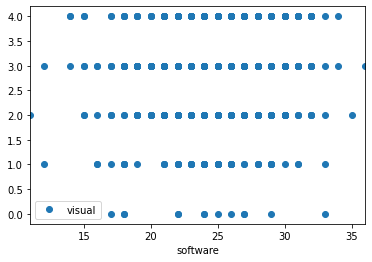

In [32]:
df2.plot(x='software', y='visual', style='o')


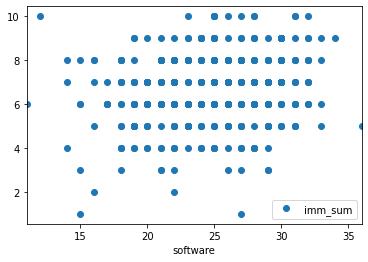

In [32]:
df2.plot(x='software', y='imm_sum', style='o')



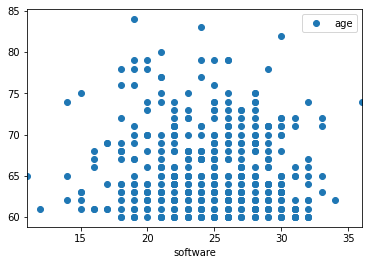

In [33]:
df2.plot(x='software', y='age', style='o')


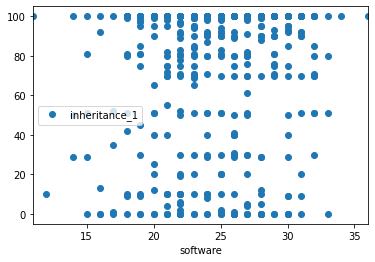

In [34]:
df2.plot(x='software', y='inheritance_1', style='o')



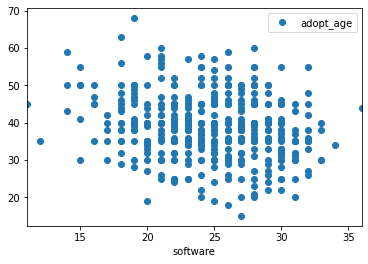

In [35]:
df2.plot(x='software', y='adopt_age', style='o')



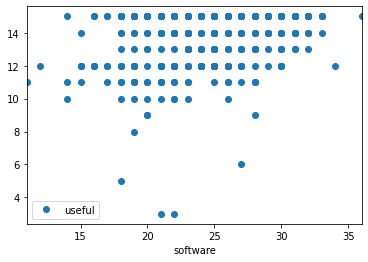

In [36]:
df2.plot(x='software', y='useful', style='o')



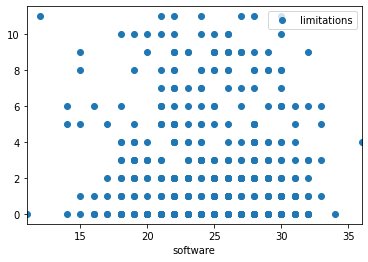

In [37]:
df2.plot(x='software', y='limitations', style='o')



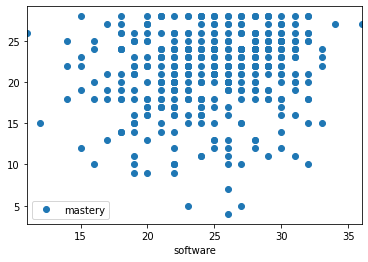

In [38]:
df2.plot(x='software', y='mastery', style='o')

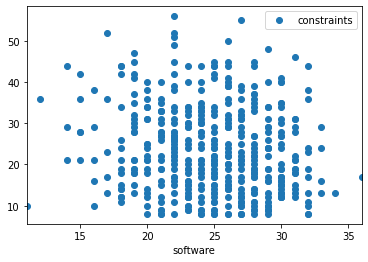

In [39]:
df2.plot(x='software', y='constraints', style='o')



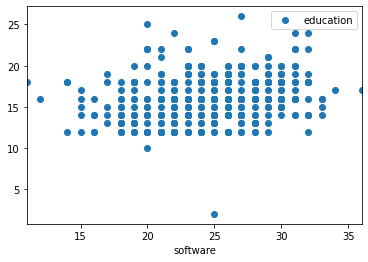

In [40]:
df2.plot(x='software', y='education', style='o')



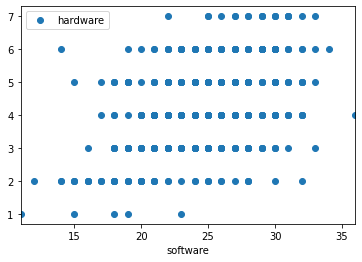

In [41]:
df2.plot(x='software', y='hardware', style='o')



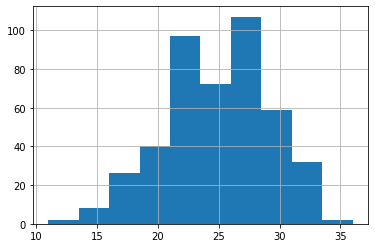

In [42]:
df2['software'].hist()

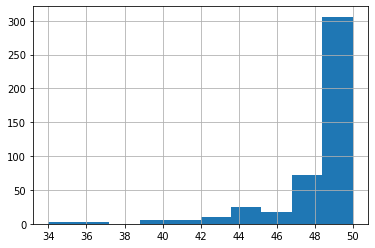

In [43]:
df2['cpq'].hist()

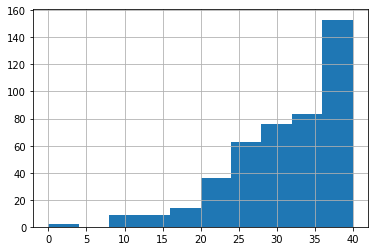

In [44]:
df2['wnpq'].hist()

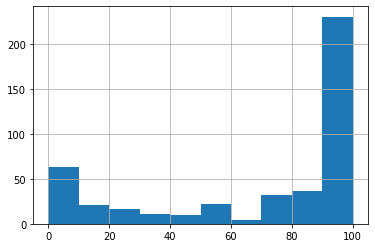

In [45]:
df2['inheritance_1'].hist()

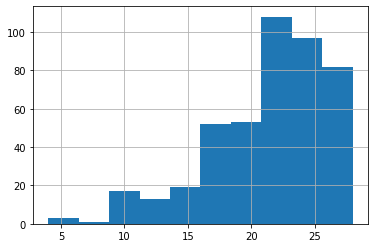

In [46]:
df2['mastery'].hist()

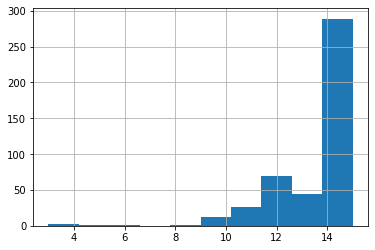

In [47]:
df2['useful'].hist()